In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
file_cuda = pd.read_csv("Ref_100.csv")
file_oneAPI = pd.read_csv("aniso_1000_20_25_2.csv")

In [56]:
def compare_plots(cuda, oneapi, name, title = None):
    fig = plt.figure(figsize=(14,6))
    if title == None:
        plt.suptitle("Comparison betwwen CUDA and oneAPI for " + name)
    else:
        plt.suptitle("Comparison betwwen CUDA and oneAPI for " + title)
    
    plt.subplot(121)
    plt.plot(cuda[name])
    plt.title("CUDA")
    plt.xlabel("index")
    plt.ylabel(name)

    plt.subplot(122)
    plt.plot(oneapi[name])
    plt.title("oneAPI")
    plt.xlabel("index")
    plt.ylabel(name)
    plt.show()

def compare_hists(cuda, oneapi, name, title = None):
    fig = plt.figure(figsize=(14,6))
    if title == None:
        plt.suptitle("Comparison betwwen CUDA and oneAPI for " + name)
    else:
        plt.suptitle("Comparison betwwen CUDA and oneAPI for " + title)    
    
    plt.subplot(121)
    plt.hist(cuda[name][:10000], bins = int(max(cuda[name])+2))
    plt.title("CUDA")
    plt.xlabel(name)
    plt.ylabel("Counts")

    plt.subplot(122)
    plt.hist(oneapi[name][:10000], bins = int(max(oneapi[name])+2))
    plt.title("oneAPI")
    plt.xlabel(name)
    plt.ylabel("Counts")
    plt.show()

In [57]:
#compare_hists(file_cuda, file_oneAPI, "isSeed")
#compare_hists(file_cuda, file_oneAPI, "rho")
#compare_hists(file_cuda, file_oneAPI, "delta")
#compare_hists(file_cuda, file_oneAPI, "nh", title="nearest neighbour")
#compare_hists(file_cuda, file_oneAPI, "clusterId")

In [58]:
name = "clusterId"
bins = max(file_cuda[name])+2
print(max(file_cuda[name]), max(file_oneAPI[name]))
chist, cbins = np.histogram(file_cuda[name], bins=bins)
ghist, gbins = np.histogram(file_oneAPI[name], bins=bins)

chist = np.sort(chist)
ghist = np.sort(ghist)

wrong = 0
for c,g in zip(chist, ghist):
    if c != g:
        wrong += 1
wrong

599 599


0

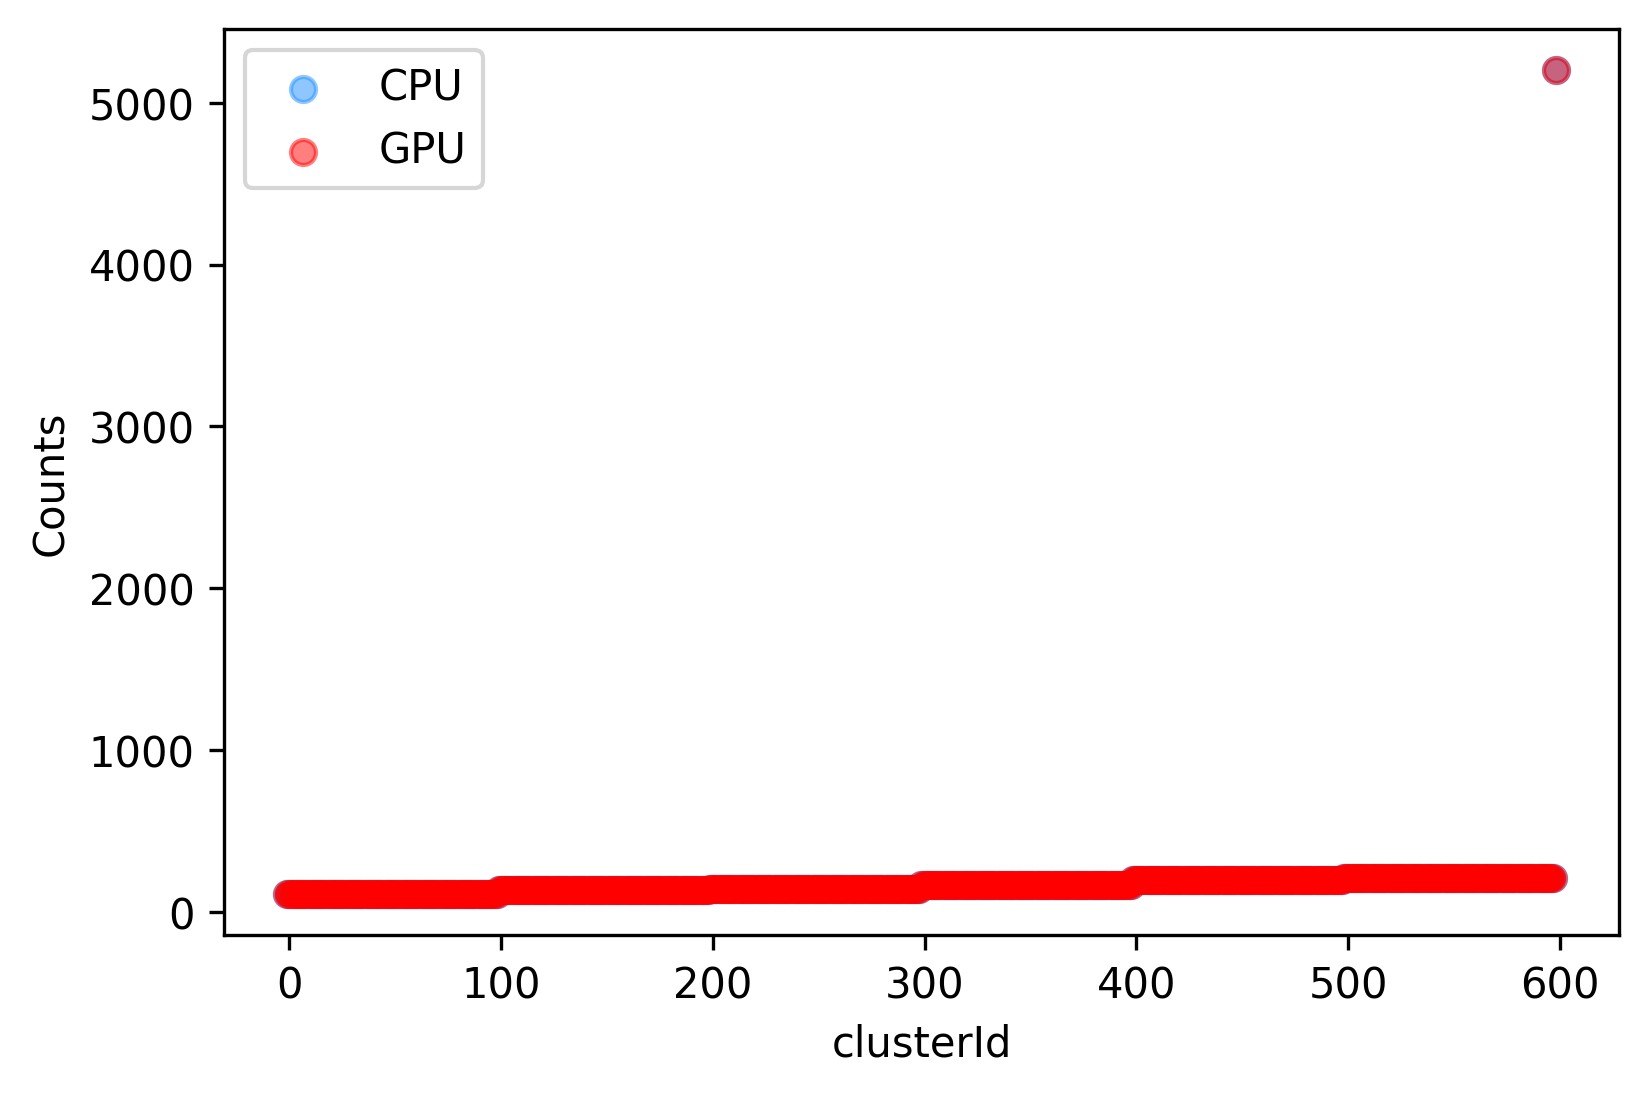

In [59]:
plt.figure(dpi=300)
plt.scatter(cbins[:-1], np.sort(chist), color = 'dodgerblue', label = 'CPU', alpha=0.5)
#plt.scatter(cbins[:-1], np.sort(gghist), color = 'forestgreen', label = '2', alpha=0.5)
plt.scatter(cbins[:-1], np.sort(ghist), color = 'red', label = 'GPU', alpha=0.5)
plt.xlabel(name)
plt.ylabel("Counts")
plt.legend()